In [1]:
!pip install scikit-learn
!pip install matplotlib-venn

In [2]:
!pip install gensim

In [3]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'

--2021-03-14 09:26:37--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.29.182
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.29.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  67.2MB/s    in 24s     

2021-03-14 09:27:01 (65.8 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [4]:
import gensim

# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [5]:
result = model.most_similar("welder")
print(result)

[('machinist', 0.7536988854408264), ('electrician', 0.739203691482544), ('carpenter', 0.7170171737670898), ('mechanic', 0.6851776838302612), ('welding', 0.6698108911514282), ('pipefitter', 0.6676819324493408), ('pipe_fitter', 0.6649168729782104), ('millwright', 0.6574079990386963), ('journeyman_electrician', 0.6564021110534668), ('mechanical_engineer', 0.6508504748344421)]


In [6]:
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman','king'],negative=['man'],topn=5)
print(result)
result1 = model.most_similar_cosmul(positive=['woman','king'],negative=['man'],topn=5)
print(result1)

[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133)]
[('queen', 0.9314123392105103), ('monarch', 0.858533501625061), ('princess', 0.8476566076278687), ('Queen_Consort', 0.8150269985198975), ('queens', 0.8099815249443054)]


**some words tested to be used for newly worked out data 2019_Massachusetts using wv.similarity=.similarity**

In [7]:
print(model.wv.similarity("man","maid"))
print(model.wv.similarity("woman","maid"))
print(model.wv.similarity("men","statisticians"))
print(model.wv.similarity("women","statisticians"))
print(model.wv.similarity("men","therapists"))
print(model.wv.similarity("women","therapists"))
print(model.wv.similarity("women","legislators"))
print(model.wv.similarity("women","Operators"))
print(model.wv.similarity("women","Logistics"))

0.31937593
0.5017852
0.21211268
0.19630387
0.11642223
0.22173055
0.16270211
0.04635876
0.009982183


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """

**previously seen occupations for 2015_occ_(since1950) as done in base paper(garg et al.) with singular and plural words**

In [8]:
print(model.similarity("man","maid"))
print(model.similarity("woman","maid"))

0.31937593
0.5017852


In [9]:
print(model.similarity("men","maids"))
print(model.similarity("women","maids"))

0.24430491
0.34649765


In [10]:
print(model.similarity("man","engineer"))
print(model.similarity("man","mechanic"))
print(model.similarity("man","carpenter"))
print(model.similarity("man","housekeeper"))
print(model.similarity("man","secretary"))
print(model.similarity("man","dancer"))
print(model.similarity("man","librarian"))
print(model.similarity("man","nurse"))

0.15128928
0.32070178
0.35935763
0.33341616
0.04001512
0.2439171
0.12730972
0.2547229


In [11]:
print(model.similarity("woman","engineer"))
print(model.similarity("woman","mechanic"))
print(model.similarity("woman","carpenter"))
print(model.similarity("woman","housekeeper"))
print(model.similarity("woman","secretary"))
print(model.similarity("woman","dancer"))
print(model.similarity("woman","librarian"))
print(model.similarity("woman","nurse"))

0.09435377
0.22833556
0.28263456
0.47661752
0.0904883
0.3646355
0.26856342
0.44135594


**Newly tried out words- cosine similarity-gender vs occupations for Massachusets_2019_occ**

In [12]:
print(model.similarity("woman","investigator"))

0.21725209


In [13]:
print(model.similarity("woman","legislator"))

0.32118675


In [14]:
print(model.similarity("woman","executive"))

0.024933225


In [15]:
print(model.similarity("woman","compliance"))
#no output with compliance_officer,complianceofficer or with either uppercase(words are not case sensitive)

-0.055862155


In [16]:
print(model.similarity("woman","lawyer"))

0.22423628


In [17]:
print(model.similarity("woman","chief_executiveofficer"))#1...
#no other combinations of chief executive officer worked
print(model.similarity("woman","chief_executive"))#2....seems the nearest
print(model.similarity("woman","chiefexecutive"))#3......
print(model.similarity("woman","qwerty"))#non-sense

-0.09622017
-0.036007345
-0.08284115
0.044886094


In [18]:
print(model.similarity("woman","estimator"))#1....-ve association between the words seems bit intriguing;(-0.00871)
print(model.similarity("woman","accountant"))#2.....ONLY UNDERSTANDABLE--------------------------
print(model.wv.similarity("woman","analyst"))#3..tried using wv.similarity..NO difference
print(model.similarity("woman","analyst"))#4...-ve association between words is bit awkward again;(-0.0378190)
print(model.similarity("man","analyst"))#5....not worth using ..probably unable to understand..word doesnt exist
print(model.similarity("woman","manager"))#6.......ONLY UNDERSTANDABLE------------
print(model.similarity("woman","analytics"))#7...atleast this seems to be better than "analyst" ;(0.026573).....ONLY UNDERSTANDABLE------
print(model.similarity("man","analytics"))#8...some sense again PARTLY UNDERSTANDABLE...but result making no sense
#substitution depends upon the words closest to the above selected words

-0.008717311
0.20212336
-0.037819084
-0.037819084
-0.06795036
0.018229041
0.026573561
0.01346856


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
print(model.similarity("woman","financial"))# unable to gather insight
print(model.similarity("woman","finance"))#again not apt
print(model.similarity("man","financial"))#3.....not much insight
print(model.similarity("man","investment"))#4.....hardly any association but dataset shows high proportion of man in investment analyst
print(model.similarity("woman","investment"))#5.....investment and woman negative association..unable to gather insight
print(model.similarity("man","advisor"))# might work........
print(model.similarity("woman","advisor"))
print(model.similarity("man","underwriter"))#works........
print(model.similarity("woman","underwriter"))
print(model.similarity("woman","officer"))# works.......
print(model.similarity("man","officer"))

0.050643984
-0.019560764
0.008122948
0.038620967
-0.001817194
0.019934274
0.0269237
0.020635225
0.09274571
0.2574699
0.25191665


In [20]:
print(model.similarity("man","estimator"))# not making much sense again if it is compared with woman also
print(model.similarity("woman","fundraiser"))
print(model.similarity("woman","planner"))#...strange ..!!! more women planner than men in data as well as in association 
print(model.similarity("man","planner"))

0.047234923
0.18111074
0.068731815
0.042321917


In [21]:
print(model.similarity("man","comptroller"))
print(model.similarity("woman","comptroller"))

0.018218303
0.08122176


In [22]:
print(model.similarity("man","accountant"))
print(model.similarity("woman","accountant"))
print(model.similarity("man","auditor"))
print(model.similarity("woman","auditor"))

0.20663752
0.20212336
0.041380987
0.10431842


In [23]:
print(model.similarity("man","lender"))
print(model.similarity("woman","lender"))

0.056589473
0.14371389


In [24]:
print(model.similarity("woman","agent"))
print(model.similarity("man","agent"))
print(model.similarity("woman","purchaser"))#...makes more sense
print(model.similarity("man","purchaser"))
print(model.similarity("woman","middleman"))#........ :) as expected
print(model.similarity("man","middleman"))
print(model.similarity("woman","buyer"))#.....makes more sense
print(model.similarity("man","buyer"))

0.10983771
0.17585923
0.19175237
0.1557307
0.0823722
0.12087475
0.21311761
0.15895228


In [25]:
print(model.similarity("woman","management"))#..if one compares men then no-sense
print(model.similarity("man","management"))#....some sense but not completely
print(model.similarity("woman","logistics"))
print(model.similarity("man","logistics"))
print(model.similarity("man","supplychain"))
print(model.similarity("woman","supplychain"))

-0.022638291
0.021651665
-0.03877483
-0.003342857
-0.104947895
-0.04107525


In [26]:
print(model.similarity("woman","specialist"))#..........using this will make the occupations loose specificity ..too general
#..might convey different meanings

0.0047455304


In [27]:
print(model.similarity("woman","firefighter"))
print(model.similarity("woman","inspector"))#wanted to use fireinspector but no output(can be used as firefighter...as same proportion for fireinspector 
#and firefighter)

0.35240024
0.19307195


In [28]:
print(model.similarity("woman","journalist"))
print(model.similarity("woman","newsperson"))
print(model.similarity("woman","drafter"))
print(model.similarity("woman","draftsperson"))#can take anyone between draftsperson and drafter 
                                               #as the association is same more or less.....although draftsperson makes more sense as more associated(0.09143)
print(model.similarity("woman","chef"))
print(model.similarity("woman","detective"))
print(model.similarity("man","detective"))
print(model.similarity("woman","jailer"))# will go with bailiff as jailer shows bit differernt results i.e. woman are more associated on the contrary it is more related to man
print(model.similarity("man","jailer"))

0.29854947
0.27181
0.050157964
0.091430746
0.1629965
0.35151663
0.37438804
0.33303544
0.29502702


In [29]:
print(model.similarity("woman","postmaster"))#1..not a gender neutral word but still it is an anomaly as postmaster has more of woman association than man
print(model.similarity("man","postmaster"))#2..
print(model.similarity("woman","postman"))#3..not a gender neutral word
print(model.similarity("woman","postwoman"))#4..more related
print(model.similarity("man","postman"))#5...mail carrier, mailman, mailwoman, postal carrier, postman, postwoman, or letter carrier(all-double-words)
#mailperson is better although it is not there in google news word embeddings
print(model.similarity("woman","postie"))#6...
print(model.similarity("man","postie"))#7...postie is better word as it exists in the google word embeddings but refers to postman;not a gender-neutral word
#In India,The Parliamentary Standing Committee on Information Technology, 
#chaired by BJP MP Anurag Thakur, has recommended to the postal department to use gender neutral term and call 'postman' as 'postperson'
#print(model.similarity("woman","postal carrier"))#not in vocabulary
#print(model.similarity("woman","postperson"))#not in vocabulary for neither man or woman

0.27380297
0.25244063
0.33614162
0.3601427
0.41171408
0.28044662
0.3082234


In [30]:
print(model.similarity("woman","paramedics"))

0.25862125


In [31]:
print(model.similarity("woman","recruiter"))
print(model.similarity("man","recruiter"))

0.17196336
0.18241338


In [32]:
print(model.similarity("woman","broker"))
print(model.similarity("woman","agent"))
print(model.similarity("woman","typist"))
print(model.similarity("woman","typesetter"))
print(model.similarity("woman","teller"))
print(model.similarity("man","teller"))
print(model.similarity("woman","audiologist"))
print(model.similarity("man","audiologist"))
print(model.similarity("man","counselor"))

0.12887813
0.10983771
0.26938513
0.20157969
0.3512208
0.30771255
0.10602327
-0.036998414
0.116191395


In [33]:
print(model.similarity("man","manicurist"))
print(model.similarity("woman","manicurist"))#towards woman
print(model.similarity("man","barber"))#towards man
print(model.similarity("woman","barber"))
print(model.similarity("man","hairstylist"))
print(model.similarity("woman","hairstylist"))#towards woman
print(model.similarity("man","cosmetologist"))#checking for relevant usage of cosmetologist vs beautician vs haistylist
print(model.similarity("woman","cosmetologist"))#towards woman
print(model.similarity("man","beautician"))
print(model.similarity("woman","beautician"))#towards woman...seems more apt as compared to hairstylist and cosmetologist

0.19229981
0.39609376
0.34525368
0.26629996
0.19508705
0.33350044
0.18427607
0.3242003
0.26517054
0.44169477


In [34]:
print(model.similarity("woman","facialist"))
print(model.similarity("man","facialist"))
print(model.similarity("woman","guide"))
print(model.similarity("man","guide"))
print(model.similarity("man","agent"))#5.........
print(model.similarity("woman","agent"))#6..........comparision
print(model.similarity("man","programmer"))
print(model.similarity("woman","programmer"))
print(model.similarity("man","developer"))
print(model.similarity("woman","developer"))
print(model.similarity("man","actuary"))

0.20789005
0.02252383
0.05072439
0.100356646
0.17585923
0.10983771
0.12616901
0.089927144
0.13249062
0.09600442
0.043732874


In [35]:
print(model.similarity("man","paralegal"))
print(model.similarity("man","Umpires"))
print(model.similarity("man","referees"))

0.085227884
0.10767062
0.18574426


In [36]:
print(model.similarity("woman","researcher"))
print(model.similarity("man","researcher"))
print(model.similarity("woman","consultant"))
print(model.similarity("man","consultant"))
print(model.similarity("woman","stocker"))
print(model.similarity("woman","supervisor"))
print(model.similarity("woman","attendant"))#attendant is better over host/hostess
print(model.similarity("man","attendant"))
print(model.similarity("woman","usher"))
print(model.similarity("woman","hostess"))#can't use this word as not gender neutral
print(model.similarity("man","host"))#can't use this word as not gender neutral
print(model.similarity("woman","cleaner"))
print(model.similarity("man","cleaner"))#cleaner is taken very generally might nor bring out variation between housekeeper(female-dominated) vs vehicle 
#cleaner(male-dominated)laborer is better word

0.12048627
0.039349996
0.07272311
0.032411788
0.14559919
0.1896553
0.30658424
0.2741861
0.08104671
0.36809936
0.07871912
0.14622737
0.14691284


In [37]:
print(model.similarity("man","strategist"))#.......... :(( tough time with selecting words
print(model.similarity("woman","strategist")) ### ....doesnt suit

-0.010138751
-0.02568594


In [38]:
print(model.similarity("man","assessor"))
print(model.similarity("man","appraiser"))
print(model.similarity("woman","appraiser"))#seems good to be considered
print(model.similarity("woman","assessor"))
print(model.similarity("woman","cost"))# does not make any sense

0.07494862
0.06705556
0.12778834
0.109875984
0.0074569276


In [40]:
print(model.similarity("woman","tester"))#...... would go with this word
print(model.similarity("man","tester"))

0.12744452
0.11637468


In [41]:
print(model.similarity("woman","sociologist"))#....just for fun, wanted to check how are these related

0.095642306


In [42]:
print(model.similarity("woman","dispatcher"))#....interesting
print(model.similarity("man","dispatcher"))

0.36976632
0.29970416


In [43]:
print(model.similarity("man","worker"))
print(model.similarity("woman","worker"))
print(model.similarity("woman","songwriter"))
print(model.similarity("woman","composer"))
print(model.similarity("woman","deejay"))
print(model.similarity("man","deejay"))

0.33030337
0.39783823
0.21773805
0.1552975
0.1634914
0.20499209


In [44]:
print(model.similarity("woman","anchor"))
print(model.similarity("man","anchor"))
print(model.similarity("man","announcer"))
print(model.similarity("woman","announcer"))
print(model.similarity("woman","lobbyist"))
print(model.similarity("woman","lobbyist"))
print(model.similarity("woman","police"))
print(model.similarity("man","police"))

0.10386158
0.09314407
0.23615736
0.13097747
0.112486035
0.112486035
0.3686657
0.366551


In [45]:
print(model.similarity("woman","abstractor"))
print(model.similarity("man","abstractor"))

0.091712564
0.032564778


In [46]:
print(model.similarity("man","actor"))#.....results are quite natural...
print(model.similarity("woman","actor"))#.........cant be used
print(model.similarity("woman","actress"))#.........
print(model.similarity("woman","compounder"))
print(model.similarity("woman","podiatrist"))
print(model.similarity("man","podiatrist"))

0.35259384
0.31721884
0.45852387
0.18276165
0.2334379
0.15695667


In [47]:
print(model.similarity("man","acupuncturist"))#....will be used
print(model.similarity("man","hygienist"))
print(model.similarity("woman","sanitarian"))
print(model.similarity("man","sanitarian"))#........not showing much of association and hence would go with 
print(model.similarity("woman","interpretor"))
print(model.similarity("woman","translator"))
print(model.similarity("woman","sonographer"))
print(model.similarity("woman","optician"))
print(model.similarity("woman","transcriptionist"))
print(model.similarity("woman","phlebotomist"))
print(model.similarity("woman","assistant"))
print(model.similarity("woman","dishwasher"))
print(model.similarity("man","dishwasher"))

0.18750092
0.017827976
0.05084941
-0.008297137
0.20846726
0.2055982
0.27558535
0.21555188
0.20353049
0.25823656
0.12619506
0.1832609
0.11250146


In [48]:
print(model.similarity("woman","mortician"))
print(model.similarity("man","mortician"))

0.2229747
0.25848088


In [49]:
print(model.similarity("man","embalmers"))
print(model.similarity("man","telemarketers"))

0.06297449
0.073322


In [50]:
print(model.similarity("man","glazier"))
print(model.similarity("man","roofer"))
print(model.similarity("man","pipelayer"))

0.23966059
0.3401932
0.015779402


In [51]:
print(model.similarity("man","proofreader"))

0.08218889


In [52]:
print(model.similarity("man","finisher"))
print(model.similarity("man","repairer"))
print(model.similarity("man","installer"))
print(model.similarity("man","blaster"))
print(model.similarity("man","rigger"))
print(model.similarity("man","fabricator"))
print(model.similarity("man","assembler"))
print(model.similarity("man","presser"))
print(model.similarity("man","woodworker"))
print(model.similarity("man","engraver"))
print(model.similarity("man","etcher"))
print(model.similarity("man","molder"))
print(model.similarity("man","caster"))
print(model.similarity("man","recapper"))# tried "retreader" for tire builder.......but can also use caster(mostly used for metal)
print(model.similarity("man","packager"))
print(model.similarity("man","packer"))
print(model.similarity("man","bagger"))

0.20512554
0.17293727
0.11186469
0.10132474
0.18101175
0.15442918
0.085336685
0.08899849
0.19641753
0.19453248
0.11573762
0.11053065
0.12177995
0.034740295
0.0647633
0.05856443
0.10397522


In [53]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [54]:
import pandas as pd
gapminder = pd.read_csv('/content/gdrive/My Drive/Data_Dissertation/occupation_percentages_gender_occ1950.csv')
print(gapminder)

      Census year   Occupation  Total Weight    Female      Male
0            2007        judge     1128029.0  0.337325  0.662675
1            1990   bookbinder       37767.0  0.559192  0.440808
2            1960  salesperson      402520.0  0.367684  0.632316
3            2000       broker     2202877.0  0.568766  0.431234
4            2007       dancer       27296.0  0.792424  0.207576
...           ...          ...           ...       ...       ...
3275         2011    machinist      433226.0  0.051147  0.948853
3276         2015       welder      761642.0  0.052389  0.947611
3277         2014      janitor     5889048.0  0.536221  0.463779
3278         1940    plasterer       59828.0  0.015043  0.984957
3279         2001  electrician      872516.0  0.028825  0.971175

[3280 rows x 5 columns]


In [55]:
is_2015 =  gapminder['Census year']==2015
print(is_2015.head())

0    False
1    False
2    False
3    False
4    False
Name: Census year, dtype: bool


In [56]:
gapminder_2015 = gapminder[is_2015]
print(gapminder_2015.shape)

(103, 5)


In [57]:
print(gapminder_2015.head())

    Census year       Occupation  Total Weight    Female      Male
15         2015       bankteller      430230.0  0.854076  0.145924
58         2015        physician      979939.0  0.349350  0.650650
67         2015           doctor      979939.0  0.349350  0.650650
78         2015          laborer     8555210.0  0.153167  0.846833
82         2015  conservationist       46974.0  0.171499  0.828501


In [58]:
print(gapminder_2015)

      Census year       Occupation  Total Weight    Female      Male
15           2015       bankteller      430230.0  0.854076  0.145924
58           2015        physician      979939.0  0.349350  0.650650
67           2015           doctor      979939.0  0.349350  0.650650
78           2015          laborer     8555210.0  0.153167  0.846833
82           2015  conservationist       46974.0  0.171499  0.828501
...           ...              ...           ...       ...       ...
3189         2015         gardener     1849854.0  0.071098  0.928902
3211         2015           driver     5639552.0  0.127969  0.872031
3243         2015      housekeeper      160547.0  0.743352  0.256648
3265         2015            guard     1942441.0  0.254756  0.745244
3276         2015           welder      761642.0  0.052389  0.947611

[103 rows x 5 columns]


In [59]:
print(gapminder_2015.Occupation.to_string(index=False))

      bankteller
       physician
          doctor
         laborer
 conservationist
         cashier
      proprietor
        operator
       bartender
        mechanic
        surveyor
       physicist
       machinist
       architect
    photographer
         teacher
     optometrist
      millwright
    tradesperson
           sales
     upholsterer
           baker
           smith
         manager
    statistician
      doorkeeper
         athlete
         bailiff
          dancer
    nutritionist
          broker
      typesetter
       dietitian
          author
           clerk
     entertainer
       economist
     boilermaker
    cabinetmaker
        official
       conductor
           nurse
          porter
      bookbinder
         chemist
       inspector
       secretary
        clerical
       therapist
       professor
      technician
     salesperson
          lawyer
          farmer
    veterinarian
     electrician
       attendant
         janitor
          sail

In [60]:
# to identify which occupations are not present in our pre-trained word embeddings vocabulary so that our next step would be to delete those observations 
# from the copy of dataframe(gapminder_2015) 
for index, row in gapminder_2015.iterrows():
    x = (row['Occupation'])
    # print(x)
    if(x in model.vocab):
      # print(model.similarity("woman",x)-model.similarity("man",x))
      print("")
    else:
      print(x)
      print(0)

bankteller
0




























































mailperson
0


































fireperson
0








In [61]:
# 'bankteller', 'mailperson' and 'fireperson'- these 3 words are not present in the pretrained word embeddings
# now create a deep copy of our dataframe(gapminder_2015)
df = gapminder_2015.copy(deep=True)
print(df)

      Census year       Occupation  Total Weight    Female      Male
15           2015       bankteller      430230.0  0.854076  0.145924
58           2015        physician      979939.0  0.349350  0.650650
67           2015           doctor      979939.0  0.349350  0.650650
78           2015          laborer     8555210.0  0.153167  0.846833
82           2015  conservationist       46974.0  0.171499  0.828501
...           ...              ...           ...       ...       ...
3189         2015         gardener     1849854.0  0.071098  0.928902
3211         2015           driver     5639552.0  0.127969  0.872031
3243         2015      housekeeper      160547.0  0.743352  0.256648
3265         2015            guard     1942441.0  0.254756  0.745244
3276         2015           welder      761642.0  0.052389  0.947611

[103 rows x 5 columns]


In [62]:
df.drop(df.index[df['Occupation'] == 'bankteller'], inplace = True)
df.drop(df.index[df['Occupation'] == 'mailperson'], inplace = True)
df.drop(df.index[df['Occupation'] == 'fireperson'], inplace = True)
print(df)
df.shape

      Census year       Occupation  Total Weight    Female      Male
58           2015        physician      979939.0  0.349350  0.650650
67           2015           doctor      979939.0  0.349350  0.650650
78           2015          laborer     8555210.0  0.153167  0.846833
82           2015  conservationist       46974.0  0.171499  0.828501
93           2015          cashier     4903985.0  0.750578  0.249422
...           ...              ...           ...       ...       ...
3189         2015         gardener     1849854.0  0.071098  0.928902
3211         2015           driver     5639552.0  0.127969  0.872031
3243         2015      housekeeper      160547.0  0.743352  0.256648
3265         2015            guard     1942441.0  0.254756  0.745244
3276         2015           welder      761642.0  0.052389  0.947611

[100 rows x 5 columns]


(100, 5)

In [63]:
for index, row in df.iterrows():
    x = (row['Occupation'])
    print(x,model.similarity("woman",x),model.similarity("man",x),model.similarity("woman",x)-model.similarity("man",x))

      
df['Average_distance_Women'] = df.apply(lambda row: model.similarity("woman",row['Occupation']) , axis = 1) 
df['Average_distance_Men'] = df.apply(lambda row: model.similarity("man",row['Occupation']) , axis = 1) 
df['Embedding_Bias'] = df['Average_distance_Women']-df['Average_distance_Men']
df['Women_Occupation_%difference']=df['Female']-df['Male']
df.drop(columns=['Female', 'Male'], inplace=True)
df.drop(columns=['Total Weight'], inplace=True)
print(df)

physician 0.17922637 0.14608215 0.03314422
doctor 0.37945858 0.31448963 0.06496894
laborer 0.34822825 0.35607132 -0.007843077
conservationist 0.09964531 0.11268963 -0.01304432
cashier 0.37909043 0.30299425 0.07609618
proprietor 0.10174261 0.14129843 -0.039555818
operator 0.19035079 0.17703927 0.01331152
bartender 0.32785302 0.3059894 0.02186361
mechanic 0.22833556 0.32070178 -0.09236622
surveyor 0.14804739 0.17181735 -0.02376996
physicist 0.14552383 0.20756437 -0.062040538
machinist 0.19074993 0.25201035 -0.061260417
architect 0.06302031 0.13818896 -0.07516865
photographer 0.26459727 0.25092793 0.013669342
teacher 0.31357846 0.25000125 0.063577205
optometrist 0.20938247 0.17282563 0.03655684
millwright 0.16632487 0.16242343 0.003901437
tradesperson 0.1962018 0.19921497 -0.0030131638
sales -0.005023744 -0.038325068 0.033301324
upholsterer 0.24020751 0.23747507 0.0027324408
baker 0.26953623 0.27507603 -0.0055398047
smith 0.08590164 0.20697457 -0.121072926
manager 0.018229041 0.07133617 -

In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

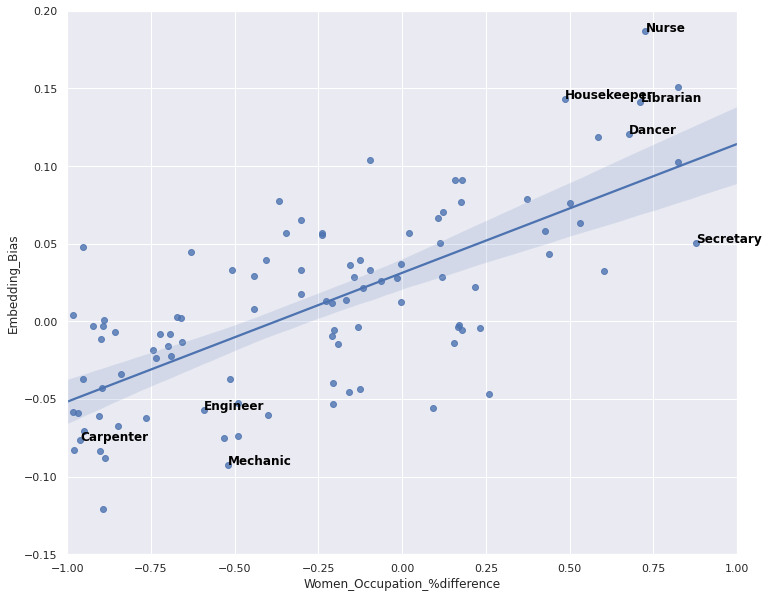

In [67]:
fig, ax = plt.subplots()

xlim = [-1,1]
ylim = [-0.15,0.2]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
p1=sns.regplot(x="Women_Occupation_%difference", y="Embedding_Bias", data=df, truncate=False);
sns.set(rc={'figure.figsize':(13,13)})



p1.text(0.678188, 0.120718,"Dancer", horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(0.878216, 0.050473,"Secretary",horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(0.711687, 0.141254,"Librarian", horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(0.726659, 0.186633,"Nurse", horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(0.486705, 0.143201,"Housekeeper", horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(-0.962318,-0.076723,"Carpenter", horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(-0.591076,-0.056936,"Engineer", horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(-0.519246,-0.092366,"Mechanic", horizontalalignment='left', size='medium', color='black', weight='semibold')
# plt.show()
plt.savefig('p1.png')

In [68]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
X = df[['Women_Occupation_%difference']]
y = df[['Embedding_Bias']]
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())
# OLS regression of Embedding_Bias on Women_Occupation_%difference

                            OLS Regression Results                            
Dep. Variable:         Embedding_Bias   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     96.00
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           3.32e-16
Time:                        09:30:41   Log-Likelihood:                 174.03
No. Observations:                 100   AIC:                            -344.1
Df Residuals:                      98   BIC:                            -338.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           